<h3>Ian Schweer</h3>
<h3>22514022</h3>

<h1>Begin part one</h1>
<ol>
    <li>H(y) = 0.97</li>
    <li><ol>
        <li>X1 IG = 0.04</li>
        <li>X2 IG = 0.86</li>
        <li>X3 IG = 0.005</li>
        <li>X4 IG = 0.092</li>
        <li>X5 IG = 0.005</li>
        <li>Split on X2, then X4 then X1</li>
    </ol></li>
    <li>
        <pre>
                X2
              0/  \1
              X4    predict -1
            0/  \1
     predict 1   X1
               0/  \1
      predict -1   predict 1
        </pre>
    </li>
    
    </ol>
</ol>

<h1>Begin part two</h1>

In [2]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt
from mltools import dtree

# load and split the data
X = np.genfromtxt("kaggle.X1.train.txt", delimiter=",")
Y = np.genfromtxt("kaggle.Y.train.txt", delimiter=",")
X,Y = ml.shuffleData(X,Y)
Xtr,Xte,Ytr,Yte = ml.splitData(X, Y, train_fraction=0.75)

# get a decision tree
dt = dtree.treeRegress(Xtr, Ytr, maxDepth=20)
print "done"

done


/Users/schweer/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
print dt.mse(Xtr, Ytr)
print dt.mse(Xte, Yte)

0.0521074106275
0.702371401502


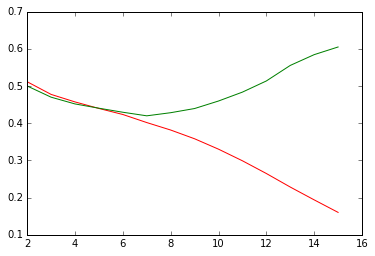

In [103]:
%matplotlib inline
train_err_depth=[]
test_err_depth=[]
for i in range(2, 16):
    dt.train(Xtr, Ytr, maxDepth=i)
    train_err_depth.append(dt.mse(Xtr, Ytr))
    test_err_depth.append(dt.mse(Xte, Yte))
plt.plot(range(2,16), train_err_depth, 'r-')
plt.plot(range(2,16), test_err_depth, 'g-')
plt.show()

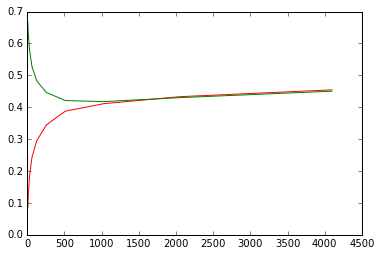

In [102]:
%matplotlib inline
parents = [2**i for i in range(3, 12+1)]
train_err=[]
test_err=[]
for p in parents:
    dt.train(Xtr, Ytr, minParent=p, maxDepth=20)
    train_err.append(dt.mse(Xtr, Ytr))
    test_err.append(dt.mse(Xte, Yte))
plt.plot(parents, train_err,'r-')
plt.plot(parents, test_err, 'g-')
plt.show()

<h1>Begin Part 3</h1>

In [51]:
# create container
bag=[]
depth=15
parent=8
nums=[1,5,10,25]
print Xtr.shape
n,m = Xtr.shape
for i in range(0, 25):
    # bootstrap all data
    Xboot,Yboot = ml.bootstrapData(Xtr, Ytr)
    
    # train learner
    dt = dtree.treeRegress(Xboot,Yboot,maxDepth=depth,minParent=parent,nFeatures=50)
    bag.append(dt)

(45000, 91)
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Aye
Done


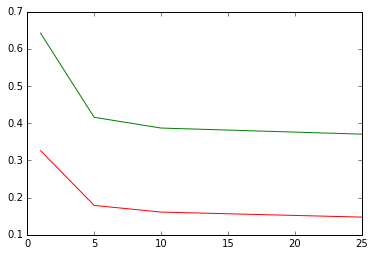

In [89]:
learner_err_tr = []
learner_err_te = []
mTest = Xte.shape[0]
for i,learners in enumerate(nums):
    # calculate the error
    predict = np.zeros((Xtr.shape[0], learners))
    predict_te = np.zeros((mTest, learners))
    for i in range(learners):
        predict[:,i] = bag[i].predict(Xtr).T[0]
        predict_te[:,i] = bag[i].predict(Xte).T[0]
    predict = np.mean(predict,axis=1)
    predict_te = np.mean(predict_te,axis=1)
    learner_err_tr.append(np.mean((predict - Ytr)**2, axis=0))
    learner_err_te.append(np.mean((predict_te - Yte)**2, axis=0))

plt.plot(nums,learner_err_tr, 'r-')
plt.plot(nums,learner_err_te, 'g-')
plt.show()

In [94]:
# do kaggle results
X_test_kaggle = np.genfromtxt("kaggle.X1.test.txt", delimiter=",")

# construct a new group of bags.
bag=[]
for i in range(0, 13):
    # bootstrap all data
    Xboot,Yboot = ml.bootstrapData(X, Y)
    
    # train learner
    dt = dtree.treeRegress(Xboot,Yboot,maxDepth=18,minParent=8,nFeatures=50)
    bag.append(dt)
print "Predicting"
predict = np.zeros((X_test_kaggle.shape[0], 12))
for i in range(12):
    predict[:,i] = bag[i].predict(X_test_kaggle).T[0]

Ye = np.mean(predict,axis=1)
fh = open('predictions.csv','w') # open file for upload
fh.write('ID,Prediction\n') # output header line
for i,yi in enumerate(Ye):
    fh.write('{},{}\n'.format(i+1,yi)) # output each prediction
fh.close() # close the file

Predicting


In [96]:
print "Position 24 as of 2/25 with err ", 0.61921

Position 24 as of 2/25 with err  0.61921
